## Treinando ADs em alguns datasets


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [69]:
# carregando o dataset MNIST
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False) # 28x28 -> 784 / pixels=[0, 255]
#X, y = load_digits(return_X_y=True) # 8x8 -> 10 classes (0,...,9)

In [62]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, shuffle=True)

In [4]:
X_train.shape

(49000, 784)

In [5]:
# Instanciamos a AD e treinamos no conjunto de treinamento
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [6]:
# Predição no conjunto de testes
preds = clf.predict(X_test)

In [7]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2077
           1       0.94      0.96      0.95      2385
           2       0.88      0.85      0.86      2115
           3       0.84      0.84      0.84      2117
           4       0.86      0.88      0.87      2004
           5       0.82      0.81      0.81      1900
           6       0.88      0.89      0.88      2045
           7       0.90      0.90      0.90      2189
           8       0.82      0.80      0.81      2042
           9       0.83      0.83      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [8]:
# Agora treinaremos outros modelos para comparar com a AD:

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression(solver='liblinear', C=0.05, random_state=0, multi_class='ovr')
lr.fit(X_train, Y_train)
#svm = SVC(kernel='rbf', C=100)
#svm.fit(X_train, Y_train)

/home/roder/anaconda3/envs/deep/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [63]:
# Predição no conjunto de testes
preds_lr = lr.predict(X_test)
#preds_svm = svm.predict(X_test)

print(classification_report(Y_test, preds_lr))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2077
           1       0.95      0.97      0.96      2385
           2       0.90      0.88      0.89      2115
           3       0.91      0.87      0.89      2117
           4       0.90      0.93      0.91      2004
           5       0.89      0.85      0.87      1900
           6       0.93      0.95      0.94      2045
           7       0.93      0.92      0.93      2189
           8       0.85      0.87      0.86      2042
           9       0.89      0.88      0.88      2126

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



In [11]:
print("AD:", preds, "vs. LR:",preds_lr)

AD: ['0' '4' '1' ... '9' '0' '1'] vs. LR: ['0' '4' '1' ... '9' '0' '1']


In [12]:
# Normalizando os dados...

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [14]:
lr2 = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
lr2.fit(x_train, Y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [15]:
# Normalizando as amostras do conjunto de testes:
x_test = scaler.transform(X_test)

# em seguida, chamamos a função predict, passando o conjunto de teste:
y_pred = lr2.predict(x_test)

In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2077
           1       0.93      0.97      0.95      2385
           2       0.91      0.89      0.90      2115
           3       0.91      0.87      0.89      2117
           4       0.89      0.93      0.91      2004
           5       0.87      0.86      0.86      1900
           6       0.93      0.94      0.94      2045
           7       0.92      0.92      0.92      2189
           8       0.87      0.85      0.86      2042
           9       0.89      0.87      0.88      2126

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



In [17]:
print("AD:", preds, "vs. LR (normalização):", y_pred)

AD: ['0' '4' '1' ... '9' '0' '1'] vs. LR (normalização): ['0' '4' '1' ... '9' '0' '1']


In [44]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, Y_train)

#x_test = scaler.transform(X_test)
y_pred2 = clf2.predict(x_test)
print(classification_report(Y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2077
           1       0.94      0.96      0.95      2385
           2       0.87      0.85      0.86      2115
           3       0.84      0.84      0.84      2117
           4       0.87      0.88      0.88      2004
           5       0.81      0.82      0.81      1900
           6       0.88      0.89      0.89      2045
           7       0.90      0.90      0.90      2189
           8       0.83      0.80      0.82      2042
           9       0.83      0.84      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000



In [48]:
print("AD (normalização):", y_pred2, "vs. LR (normalização):", y_pred)

AD (normalização): ['0' '4' '1' ... '9' '0' '1'] vs. LR (normalização): ['0' '4' '1' ... '9' '0' '1']



# Treinando ADs e plotando a superfície de decisão no dataset Iris:

Para cada par de atributos das flores, a AD aprende as margens de deicsão a partir de regras de limiares simples a partir dos dados de treinamento.

In [45]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()

Mostra a função de decisão das árvores treinadas em todos os pares de atributos.

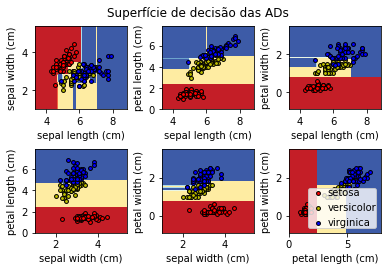

In [46]:
# Parametros
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # pegaremos apenas os atributos correspondentes
    X = iris.data[:, pair]
    y = iris.target

    # treinamento
    clf = DecisionTreeClassifier().fit(X, y)

    # plota a fronteira de decisão
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plota as amostras de treinamento
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Superfície de decisão das ADs")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Agora, podemos mostrar a estrutura de uma AD completa, treinada em todos os atributos do dataset:

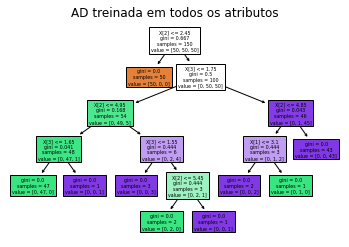

In [64]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("AD treinada em todos os atributos")
plt.savefig("ad_iris", dpi=300, bbox_inches='tight')
plt.show()

## Agora, vejamos como ocorre o processo de poda, utilizando o CCP

A poda de complexidade de custo mínimo é um algoritmo usado para podar uma árvore para evitar o ajuste excessivo. Este algoritmo é parametrizado por $\alpha \geq 0 $ conhecido como parâmetro de complexidade. O parâmetro de complexidade é usado para definir a medida de complexidade de custo, $R_{\alpha}(T)$ de uma determinada árvore T:

$R_{\alpha}(T) = R(T) + \alpha|T^{'}|$,

onde $|T^{'}|$ é o número de nós terminais em $T$ e $R(T)$ é tradicionalmente definido como a taxa total de erros de classificação dos nós terminais. Alternativamente, o scikit-learn usa a impureza total ponderada da amostra dos nós terminais para $R(T)$. Como mostrado acima, a impureza de um nó depende do critério. A poda de complexidade de custo mínima encontra a subárvore de $T$ que minimiza $R_{\alpha}(T)$.

A medida de complexidade de custo de um único nó é $R_{\alpha}(T) = R(T) + |T^{'}|$. O ramo $T_{t}$ é definido como uma árvore onde o nó $t$ é sua raiz. Em geral, a impureza de um nó é maior que a soma das impurezas de seus nós terminais, $R(T_{t}) < R(T)$. No entanto, a medida de complexidade de custo de um nó, $t$, e seu ramo, $T_{t}$
, pode ser igual dependendo $\alpha$. Definimos o efetivo $\alpha$ de um nó para ser o valor onde eles são iguais, $R_{\alpha}(T_{t}) = R_{\alpha}(t)$ ou $\alpha_{eff}(t) = \dfrac{R(t)-R(T_t)}{|T-1|}$. Um nó não terminal com o menor valor de $\alpha_{eff}$ é o elo mais fraco e será podado. Este processo para quando o $\alpha_{eff}$ mínimo da árvore podada
é maior que o parâmetro ``ccp_alpha``.


In [76]:
# Dividindo novamente os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.3,
                                                    random_state=0, shuffle=True)

## Impureza total das folhas vs alfas efetivos da árvore podada

A poda de complexidade de custo mínimo, recursivamente encontra o nó com o "elo mais fraco". O elo mais fraco é caracterizado por um alfa efetivo, onde os nós com o menor alfa efetivo são podados primeiro.

Para ter uma ideia de quais valores de ``ccp_alpha`` podem ser apropriados, o scikit-learn fornece a função ``cost_complexity_pruning_path`` que retorna os alfas efetivos e as impurezas totais correspondentes à folha em cada etapa do processo de poda. 

À medida que o alfa aumenta, mais da árvore é podada, o que aumenta a impureza total de suas folhas.

In [77]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0) # testar 'entropy'...
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

No gráfico a seguir, o valor do alfa máximo efetivo é removido, pois é a árvore trivial com apenas um nó.

Text(0.5, 1.0, 'Impureza total vs. alpha efetivo no conjunto de treinamento')

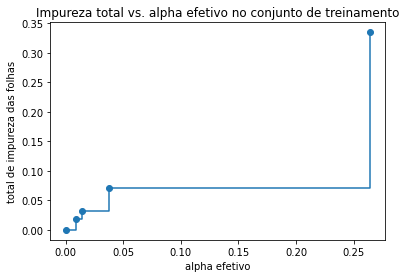

In [78]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total de impureza das folhas")
ax.set_title("Impureza total vs. alpha efetivo no conjunto de treinamento")

Em seguida, treinamos uma AD usando os alfas efetivos. 

O último valor em ``ccp_alpha`` é o valor alpha que poda toda a árvore, deixando a árvore, clfs[-1], com um nó.

In [79]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Número de nós na última árvore é: {} com ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Número de nós na última árvore é: 1 com ccp_alpha: 0.32949953690396344


Para o restante deste exemplo, removemos o último elemento em clfs e ``ccp_alpha`` porque é a árvore trivial com apenas um nó. 

Aqui mostramos que o número de nós e a profundidade da árvore diminuem à medida que alpha aumenta.

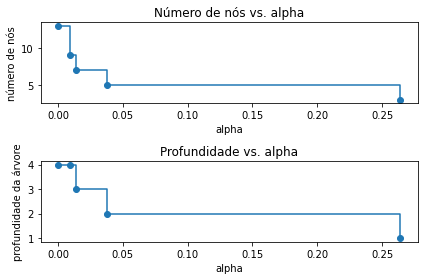

In [80]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs. alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs. alpha")
fig.tight_layout()

## Acurácia vs alpha para conjuntos de treinamento e teste

Quando ``ccp_alpha`` é definido como zero, e mantendo os outros parâmetros padrão da AD, a árvore se sobreajusta, levando a uma taxa de acerto de treinamento de 100% e taxa de acerto de teste de 88\%. À medida que alpha aumenta, mais da árvore é podada, criando assim uma árvore de decisão que generaliza melhor. 

Neste exemplo, configurar ``ccp_alpha`` = 0.02 maximiza a acurácia no teste.

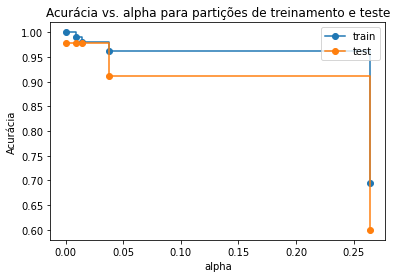

In [81]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia vs. alpha para partições de treinamento e teste")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()